In [67]:
import numpy as np
import sympy as sp
import math
import matplotlib.pyplot as plt

x, y, t = sp.symbols('x y t')

In [68]:
def euler_method(family_of_curves, x_start, y_start, t_min, t_max, h, eps, orientation):
    list_x = [x_start]
    list_y = [y_start]
    list_parameter = [t_min]

    parameter = t_min
    plt.plot(x_start, y_start, 'r.')

    num_of_attention = 0
    num_of_complex = 0
    num_of_iteration = 0

    # Calculate the gradient
    gradient_x = sp.diff(family_of_curves, x)
    gradient_y = sp.diff(family_of_curves, y)
    #print(f"Gradient: ({gradient_x}, {gradient_y})")

    while parameter <= t_max:
        # Evaluate the gradient at the current point and time
        grad_x_val = gradient_x.subs({x: x_start, y: y_start, t: parameter})
        grad_y_val = gradient_y.subs({x: x_start, y: y_start, t: parameter})
        #print(f"Gradient: ({grad_x_val}, {grad_y_val})")

        norm = math.sqrt(grad_x_val**2 + grad_y_val**2)
        #print(norm)

        if (orientation == '+'):
            if abs(norm) > eps:
                move_x = -float(grad_y_val)/norm
                move_y = float(grad_x_val)/norm
            else:
                #print("Delenie nulou!")
                num_of_attention += 1
        if (orientation == '-'):
            if abs(norm) > eps:
                move_x = float(grad_y_val)/norm
                move_y = -float(grad_x_val)/norm
            else:
                #print("Delenie nulou!")
                num_of_attention += 1

        #print(f"Tangent: ({move_x}, {move_y})")
        x_new = x_start + h * move_x
        y_new = y_start + h * move_y
        #print(f"New point: ({x_new}, {y_new})")

        list_x.append(x_new)
        list_y.append(y_new)

        x_start = x_new
        y_start = y_new
        plt.plot(x_new, y_new, 'b.')

        # Solving equation for parameter t
        equation = sp.Eq(family_of_curves, 0)
        solutions = []
        solutions = sp.solveset(equation.subs({x: x_new, y: y_new}), t, domain=sp.S.Reals)
        print(solutions)

        if len(solutions) == 2:
            parameter = solutions.args[1]
        elif len(solutions) == 1:
            parameter = solutions.args[0]
        else:
            parameter = parameter
            num_of_complex += 1
 
        list_parameter.append(parameter)
        num_of_iteration += 1

    print("\nEuler's method:")
    print('Počet nulových gradientov: ' + str(num_of_attention))
    print('Počet komplexných koreňov: ' + str(num_of_complex) )
    print('Počet iterácií: ' + str(num_of_iteration))
     

Starting point is (-1.7071067811865475,-0.2928932188134523) and t=-1
EmptySet
{-0.958432667619338, -0.759426467197294}
EmptySet
EmptySet
EmptySet
{-0.691747002671937, -0.463915854927207}
EmptySet
EmptySet
EmptySet
{-0.385883527466917, -0.207611824906089}
EmptySet
EmptySet
EmptySet
{-0.145424903964179, 0.113999209971844}
EmptySet
EmptySet
EmptySet
{0.211674157549141, 0.318760005816372}
EmptySet
EmptySet
{0.377038722079085, 0.576143849557572}
EmptySet
EmptySet
EmptySet
{0.643852625841931, 0.87152653253511}
EmptySet
EmptySet
EmptySet
{0.949489768090493, 1.1280577020989}

Euler's method:
Počet nulových gradientov: 0
Počet komplexných koreňov: 21
Počet iterácií: 29


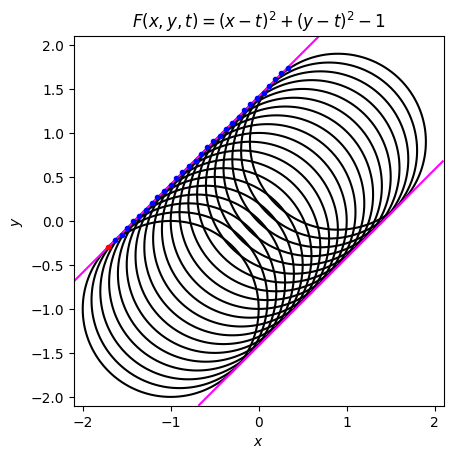

In [69]:
family_of_curves = (x-t)**2 + (y-t)**2  - 1
x_start = -1 - math.sqrt(2)/2
y_start = x_start + math.sqrt(2)
t_min = -1
t_max = 1
h = 0.1
eps = 0.0001
orientation = '-'
print(f"Starting point is ({x_start},{y_start}) and t={t_min}")

axlimx = 2.1
axlimy = 2.1
x_vals = np.linspace(-axlimx, axlimx, 100)
y_vals = np.linspace(-axlimy, axlimy, 100)
X, Y = np.meshgrid(x_vals, y_vals)

for t_vals in np.arange(-1,1,0.1):
    Fxy = (X-t_vals)**2 + (Y-t_vals)**2  - 1
    plt.contour(X, Y, Fxy, levels=[0], colors='black')

Exy1 = Y - X + math.sqrt(2)
Exy2 = Y - X - math.sqrt(2)
plt.contour(X, Y, Exy1, levels=[0], colors='magenta')
plt.contour(X, Y, Exy2, levels=[0], colors='magenta')
plt.gca().set_aspect('equal')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title(r'$F(x, y, t) = (x-t)^2 + (y-t)^2 - 1$')

euler_method(family_of_curves, x_start, y_start, t_min, t_max, h, eps, orientation)
plt.show()


Starting point is (-1,1) and t=-1

Euler's method:
{-0.95}
{-0.9}
{-0.85}
{-0.8}
{-0.75}
{-0.7}
{-0.65}
{-0.6}
{-0.55}
{-0.5}
{-0.45}
{-0.4}
{-0.35}
{-0.3}
{-0.25}
{-0.2}
{-0.15}
{-0.0999999999999997}
{-0.0499999999999997}
{3.19189119579733e-16}
{0.0500000000000003}
{0.1}
{0.15}
{0.2}
{0.25}
{0.3}
{0.35}
{0.4}
{0.45}
{0.5}
{0.55}
{0.6}
{0.65}
{0.700000000000001}
{0.750000000000001}
{0.800000000000001}
{0.850000000000001}
{0.900000000000001}
{0.950000000000001}
{1.0}

Euler's method:
Počet nulových gradientov: 0
Počet komplexných koreňov: 0
Počet iterácií: 40


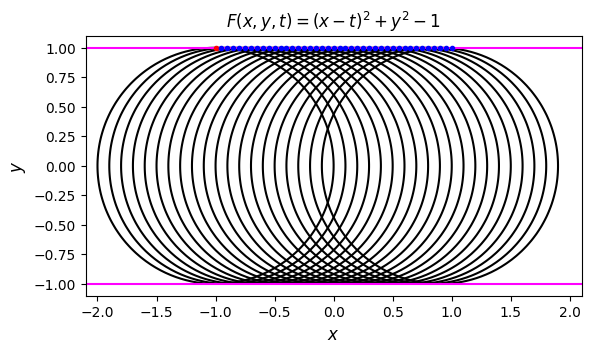

In [70]:
# Define function, initial values, and other parameters
family_of_curves = (x - t)**2 + y**2 - 1
x_start = -1
y_start = 1
t_min = -1
t_max = 1
h = 0.05
eps = 0.0001
orientation = '-'
print(f"Starting point is ({x_start},{y_start}) and t={t_min}")

axlimx = 2.1
axlimy = 1.1
x_vals = np.linspace(-axlimx, axlimx, 100)
y_vals = np.linspace(-axlimy, axlimy, 100)
X, Y = np.meshgrid(x_vals, y_vals)

# Create the contour plot
for t_val in np.arange(-1, 1, 0.1):
    Fxy = (X - t_val)**2 + Y**2 - 1
    plt.contour(X, Y, Fxy, levels=[0], colors='black')

Exy1 = Y - 1
Exy2 = Y + 1
plt.contour(X, Y, Exy1, levels=[0], colors='magenta')
plt.contour(X, Y, Exy2, levels=[0], colors='magenta')

# Add labels and title
plt.xlabel('$x$', fontsize='12')
plt.ylabel('$y$', fontsize='12')
plt.gca().set_aspect('equal')
plt.title(r'$F(x, y, t) = (x-t)^2 + y^2 - 1$', fontsize='12')

print("\nEuler's method:")
euler_method(family_of_curves, x_start, y_start, t_min, t_max, h, eps, orientation)
plt.show()

Starting point: (1,-1), t=-1
{-1.0, -0.955278640450004}
{-0.955278640450024, -0.953627252892767}
{-0.953627252892766, -0.908842893958394}
{-0.908842893958389, -0.90542528203585}
{-0.90542528203585, -0.860501437118783}
{-0.860501437118775, -0.855185130955663}
{-0.855185130955663, -0.810028346601909}
{-0.810028346601904, -0.802659541591326}
{-0.802659541591325, -0.757154910671094}
{-0.757154910671098, -0.747553998986785}
{-0.747553998986786, -0.701559428074456}
{-0.701559428074457, -0.689515825905857}
{-0.689515825905859, -0.642854896422343}
{-0.642854896422346, -0.628121630880029}
{-0.628121630880029, -0.580575248218375}
{-0.580575248218373, -0.562864805689648}
{-0.562864805689647, -0.514162928283171}
{-0.514162928283171, -0.493148410054904}
{-0.493148410054904, -0.442966121489499}
{-0.4429661214895, -0.418297690020431}
{-0.418297690020431, -0.36626718240963}
{-0.366267182409629, -0.337626464703374}
{-0.337626464703374, -0.283392036513395}
{-0.283392036513395, -0.250628627614849}
{-0.25

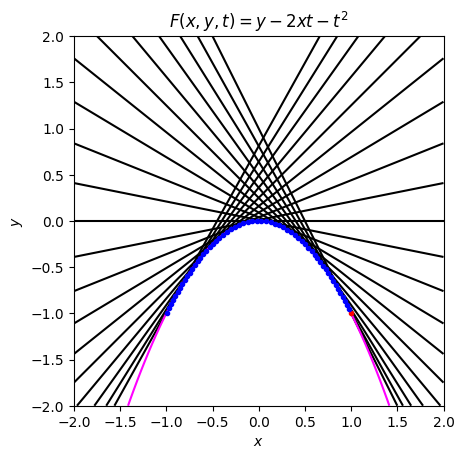

In [71]:
family_of_curves = y - 2*x*t - t**2
x_start = 1
y_start = -1
t_min = -1
t_max = 1
h = 0.05
eps = 0.0001
orientation = '+'
print(f"Starting point: ({x_start},{y_start}), t={t_min}")

axlim = 2
x_vals = np.linspace(-axlim, axlim, 100)
X, Y = np.meshgrid(x_vals, x_vals)

for t_vals in np.arange(-1,1,0.1):
    Fxy =  Y - 2*X*t_vals - t_vals**2
    plt.contour(X, Y, Fxy, levels=[0], colors='black')

Exy = Y + X**2
plt.contour(X, Y, Exy, levels=[0], colors='magenta')

plt.gca().set_aspect('equal')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title(r'$F(x, y, t) = y - 2xt - t^2$')

euler_method(family_of_curves, x_start, y_start, t_min, t_max, h, eps, orientation)
plt.show()

Starting point: (2,3), t=-1
EmptySet
EmptySet
EmptySet
EmptySet
{-0.954447523044202, -0.880960985290829}
EmptySet
EmptySet
EmptySet
EmptySet
EmptySet
EmptySet
EmptySet
{-0.806995573983219, -0.734719624899053}
EmptySet
EmptySet
EmptySet
EmptySet
EmptySet
EmptySet
{-0.630177004267412, -0.609572710355704}
EmptySet
EmptySet
EmptySet
EmptySet
{-0.517923870652485, -0.464488864662555}
EmptySet
EmptySet
EmptySet
EmptySet
EmptySet
{-0.348581533438089, -0.247266687227789}
EmptySet
EmptySet
EmptySet
EmptySet
EmptySet
EmptySet
{-0.095906883899191, 0.120309874480156}
EmptySet
EmptySet
EmptySet
EmptySet
EmptySet
EmptySet
EmptySet
EmptySet
{0.304625559005873, 0.458087435498106}
EmptySet
EmptySet
EmptySet
EmptySet
EmptySet
EmptySet
EmptySet
EmptySet
{0.590674300785186, 0.66765686132369}
EmptySet
EmptySet
EmptySet
EmptySet
EmptySet
EmptySet
EmptySet
{0.746482096081358, 0.849744069040234}
EmptySet
EmptySet
EmptySet
EmptySet
EmptySet
EmptySet
EmptySet
EmptySet
{0.940112435236973, 0.97619769753815}
EmptyS

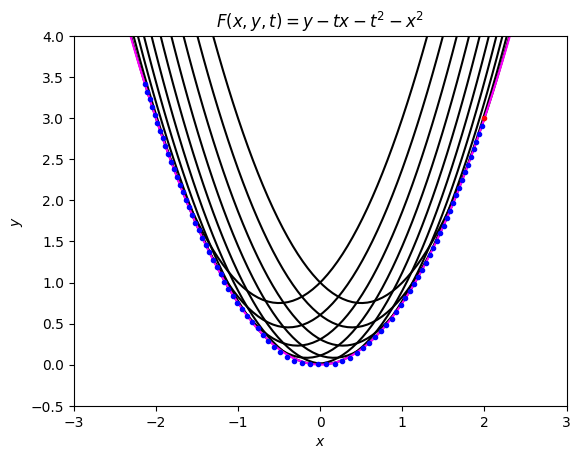

In [72]:
family_of_curves = y - t*x - t**2 - x**2
x_start = 2
y_start = 3
t_min = -1
t_max = 1
h = 0.1
eps = 0.0001
orientation = '+'
print(f"Starting point: ({x_start},{y_start}), t={t_min}")

axlim = 3
aylim = 4
x_vals = np.linspace(-axlim, axlim, 100)
y_vals = np.linspace(-0.5, aylim, 100)
X, Y = np.meshgrid(x_vals, y_vals)

for t_vals in np.linspace(-1,1,10):
    Fxy = Y - t_vals*X - t_vals**2 - X**2
    plt.contour(X, Y, Fxy, levels=[0], colors='black')

Exy = Y - 3/4 * X**2
plt.contour(X, Y, Exy, levels=[0], colors='magenta')

plt.gca().set_aspect('equal')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title(r'$F(x, y, t) = y - tx - t^2 - x^2$')

euler_method(family_of_curves, x_start, y_start, t_min, t_max, h, eps, orientation)
plt.show()

Starting point: (0,-1), t=-1
{-0.9}
{-0.8}
{-0.7}
{-0.6}
{-0.5}
{-0.4}
{-0.3}
{-0.2}
{-0.1}
{-1.38777878078145e-16}
{0.0999999999999999}
{-1.38777878078145e-16}
{-0.1}
{-1.38777878078145e-16}
{0.0999999999999999}
{-1.38777878078145e-16}
{-0.1}
{-1.38777878078145e-16}
{0.0999999999999999}
{-1.38777878078145e-16}
{-0.1}
{-1.38777878078145e-16}
{0.0999999999999999}
{-1.38777878078145e-16}
{-0.1}
{-1.38777878078145e-16}
{0.0999999999999999}
{-1.38777878078145e-16}
{-0.1}
{-1.38777878078145e-16}
{0.0999999999999999}
{-1.38777878078145e-16}
{-0.1}
{-1.38777878078145e-16}
{0.0999999999999999}
{-1.38777878078145e-16}
{-0.1}
{-1.38777878078145e-16}
{0.0999999999999999}
{-1.38777878078145e-16}
{-0.1}
{-1.38777878078145e-16}
{0.0999999999999999}
{-1.38777878078145e-16}
{-0.1}
{-1.38777878078145e-16}
{0.0999999999999999}
{-1.38777878078145e-16}
{-0.1}
{-1.38777878078145e-16}
{0.0999999999999999}
{-1.38777878078145e-16}
{-0.1}
{-1.38777878078145e-16}
{0.0999999999999999}
{-1.38777878078145e-16}
{-0

KeyboardInterrupt: 

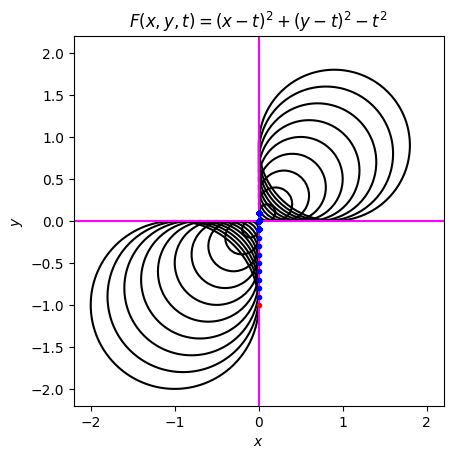

In [73]:
family_of_curves = (x - t)**2 + (y - t)**2 - t**2
x_start = 0
y_start = -1
t_min = -1
t_max = 1
h = 0.1
eps = 0.0001
orientation = '+'
print(f"Starting point: ({x_start},{y_start}), t={t_min}")

axlim = 2.2
x_vals = np.linspace(-axlim,axlim,100)
X, Y = np.meshgrid(x_vals,x_vals)

for t_vals in np.arange(t_min, t_max, 0.1):
    Fxy = (X-t_vals)**2 + (Y-t_vals)**2 - t_vals**2
    plt.contour(X, Y, Fxy, levels=[0], colors='black')

Exy1 = X
Exy2 = Y
plt.contour(X, Y, Exy1, levels=[0], colors='magenta')
plt.contour(X, Y, Exy2, levels=[0], colors='magenta')

plt.gca().set_aspect('equal')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title(r'$F(x, y, t) = (x-t)^2 + (y-t)^2 - t^2$')

euler_method(family_of_curves, x_start, y_start, t_min, t_max, h, eps, orientation)
plt.show() 

Starting point: (0.403,0.0655), t=0
{-0.598787869145321}
{-0.599821029348775}
{-0.600491872902453}
{-0.600900348373157}
{-0.601114543897895}
{-0.601182708642284}
{-0.601140119663255}
{-0.601013226943587}
{-0.600822268941182}
{-0.600582984766258}
{-0.600307770676214}
{-0.600006483083896}
{-0.599687010274237}
{-0.599355689088223}
{-0.599017615456415}
{-0.598676880817037}
{-0.5983367557989}
{-0.597999835655661}
{-0.597668157395281}
{-0.597343295513118}
{-0.597026441188737}
{-0.596718468415271}
{-0.596419989581381}
{-0.596131402376867}
{-0.595852929447154}
{-0.595584651913389}
{-0.595326537658474}
{-0.595078465124115}
{-0.594840243249164}
{-0.594611628091079}
{-0.594392336601368}
{-0.594182057966566}
{-0.5939804628751}
{-0.593787211025307}
{-0.59360195714952}
{-0.593424355792974}
{-0.593254065053783}
{-0.593090749461225}
{-0.592934082143756}
{-0.592783746415391}
{-0.592639436889132}
{-0.59250086020877}
{-0.592367735475352}
{-0.592239794431774}
{-0.592116781457942}
{-0.591998453419651}
{-0.

KeyboardInterrupt: 

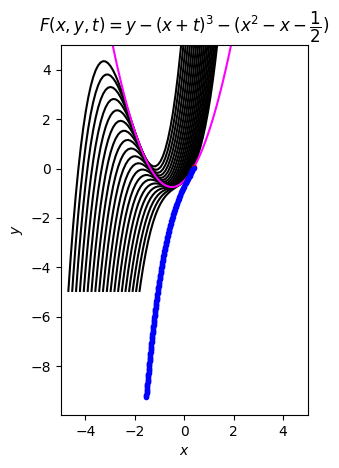

In [ ]:
family_of_curves = y - (x+t)**3 - (x**2 + x - 1/2)
x_start = 0.403
y_start = 0.0655
t_min = 0
t_max = 2
h = 0.05
eps = 0.0001
orientation = '+'
print(f"Starting point: ({x_start},{y_start}), t={t_min}")

axlim = 5
x_vals = np.linspace(-axlim, axlim, 100)
X, Y = np.meshgrid(x_vals, x_vals)

for t_vals in np.arange(t_min, t_max, 0.1):
    Fxy = Y - (X+t_vals)**3 - (X**2 + X - 1/2)
    plt.contour(X, Y, Fxy, levels=[0], colors='black')

Exy = X**2 + X - 1/2 - Y
plt.contour(X, Y, Exy, 0, colors='magenta')

plt.gca().set_aspect('equal')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title(r'$F(x, y, t) = y - (x+t)^3 - (x^2-x-\dfrac{1}{2})$')
euler_method(family_of_curves, x_start, y_start, t_min, t_max, h, eps, orientation)
plt.show()

Starting point: (-10,2), t=-10
{9.93703200864689, 10.0631669987912}
{9.93703982639921, 10.0651581847634}
{9.93704752537828, 10.0671494578692}
{9.93705510914571, 10.069140814046}
{9.93706258110594, 10.0711322493883}
{9.93706994451538, 10.0731237601383}
{9.93707720249081, 10.0751153426777}
{9.93708435801729, 10.0771069935196}
{9.93709141395543, 10.0790987093016}
{9.93709837304821, 10.0810904867785}
{9.93710523792733, 10.083082322816}
{9.93711201111915, 10.0850742143854}
{9.93711869505022, 10.0870661585571}
{9.93712529205244, 10.0890581524963}
{9.93713180436797, 10.0910501934574}
{9.93713823415368, 10.0930422787802}
{9.93714458348552, 10.0950344058849}
{9.93715085436244, 10.0970265722687}
{9.93715704871014, 10.0990187755017}
{9.93716316838465, 10.1010110132235}
{9.93716921517562, 10.1030032831397}
{9.93717519080944, 10.1049955830192}
{9.93718109695217, 10.1069879106909}
{9.93718693521236, 10.1089802640407}
{9.93719270714362, 10.1109726410096}
{9.93719841424709, 10.1129650395907}
{9.937204

Traceback (most recent call last):
  File "c:\Python311\Lib\site-packages\sympy\core\assumptions.py", line 499, in getit
    return self._assumptions[fact]
           ~~~~~~~~~~~~~~~~~^^^^^^
KeyError: 'zero'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\tutko\AppData\Local\Temp\ipykernel_15072\1528119374.py", line 27, in <module>
    euler_method(family_of_curves, x_start, y_start, t_min, t_max, h, eps, orientation)
  File "C:\Users\tutko\AppData\Local\Temp\ipykernel_15072\2082784563.py", line 57, in euler_method
    solutions = sp.solveset(equation.subs({x: x_new, y: y_new}), t, domain=sp.S.Reals)
                            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Python311\Lib\site-packages\sympy\core\basic.py", line 1040, in subs
    rv = rv._subs(old, 

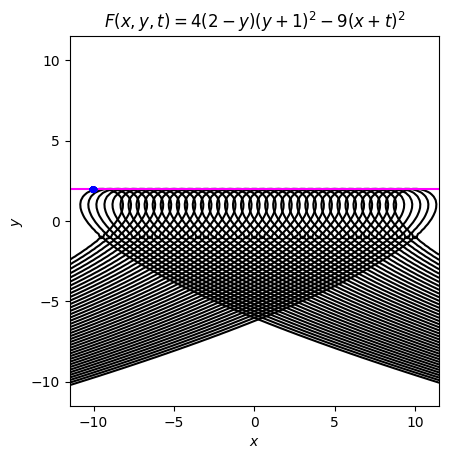

In [ ]:
family_of_curves = (4*(2-y)*(y+1)**2) - (9*(x+t)**2)
x_start = -10
y_start = 2
t_min = -10
t_max = 10
h = 0.001
eps = 0.0001
orientation = '-'
print(f"Starting point: ({x_start},{y_start}), t={t_min}")

axlim = 11.5
x_vals = np.linspace(-axlim, axlim, 100)
X, Y = np.meshgrid(x_vals, x_vals)

for t_vals in np.arange(t_min, t_max, 0.5):
    Fxy = (4*(2-Y)*(Y+1)**2) - (9*(X+t_vals)**2)
    plt.contour(X, Y, Fxy, levels=[0], colors='black')

Exy = Y - 2
plt.contour(X, Y, Exy, levels=[0], colors='magenta')

plt.gca().set_aspect('equal')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title(r'$F(x, y, t) = 4(2-y)(y+1)^2 - 9(x+t)^2$')

euler_method(family_of_curves, x_start, y_start, t_min, t_max, h, eps, orientation)
plt.show()